### Assignment: Alternus Vera

- Name: Ravali Nagabandi
- SJSU ID: 011530454
- Team: 3musketeers
- Feature: Bias
- Dataset: Liar Liar

#### Identified these 7 features that influence fake news:

- Political affiliation - Kaggle /Liar -Liar + NYT + Guardian
- Social Media (yellow press + internet) - https://github.com/KaiDMML/FakeNewsNet + Kaggel dataset
- Bias - https://github.com/clips/news-audit
- Domain Ranking -https://github.com/several27/FakeNewsCorpus
- Stance Detection - http://www.fakenewschallenge.org/ + dataset in the same link
- Fact checks https://github.com/sumeetkr/AwesomeFakeNews + dataset in the git link
- Click Bait - click bait challenge


#### Following are the datasets explored as part of this project

- Kaggles fake news dataset for Fake news
- NYT API and The Guardian Post API to get real news
- LIAR dataset: https://www.cs.ucsb.edu/william/data/liar_dataset.zip
- BS Detector: https://github.com/bs-detector/bs-detector
- CredBank: compsocial.github.io/CREDBANK-data
- Buzzfeed News: https://github.com/BuzzFeedNews/everything
- Corpus of News on the Web (NOW): https://corpus.byu.edu/now/
- Google trends: https://trends.google.com/trends/
- Click Bait(y) dataset from Kaggle: The Examiner - SpamClickBait News Dataset:    https://www.kaggle.com/therohk/examine-the-examiner
- Click Bait Challenge: https://www.clickbait-challenge.org/#data

### Bias:
- Any dataset carries demographic bias: latent information about the demographics of the people that produced it.

- E.g. speech technology works better for white men from California.
- In the liar liar dataset, we have identified Bias as one of the important features (based on the columns - 'Statement' and 'Party Affiliation') where we would find how biased is a political party(Party Affiliation) is towards a topic based on the comments(Statement) they made.

References:
- https://github.com/nishitpatel01/Fake_News_Detection
- https://nlp.stanford.edu/projects/glove/
- https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/
- https://drive.google.com/file/d/1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK/view
- http://www.fakenewschallenge.org/
- https://github.com/clips/news-audit
- https://github.com/aarsanjani/NLP-with-Python
- https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

### Process:


![processflow](https://user-images.githubusercontent.com/31532756/49483263-6479a580-f7e7-11e8-9899-b47a26700381.png)


In [1]:
import pandas as pd
import csv
import numpy as np
import nltk
from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
import seaborn as sb


In [2]:
#reading data files 

test_filename = 'test.csv'
train_filename = 'train.csv'
valid_filename = 'valid.csv'

train_news = pd.read_csv('/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Assignment_Alternus Vera/Part III/liar-liar/train.csv')
test_news = pd.read_csv('/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Assignment_Alternus Vera/Part III/liar-liar/testfile.csv')
valid_news = pd.read_csv('/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Assignment_Alternus Vera/Part III/liar-liar/valid.csv')

In [3]:
#data observation
def data_obs():
    print("training dataset size:")
    print(train_news.shape)
    print(train_news.head(10))

    #below dataset were used for testing and validation purposes
    print("testing dataset size:")
    print(test_news.shape)
    print(test_news.head(10))
    
    print("validating dataset size:")
    print(valid_news.shape)
    print(valid_news.head(10))


In [4]:
data_obs()

training dataset size:
(10240, 15)
           ID        label                                          statement  \
0   2635.json        FALSE  Says the Annies List political group supports ...   
1  10540.json    half-true  When did the decline of coal start? It started...   
2    324.json  mostly-true  Hillary Clinton agrees with John McCain "by vo...   
3   1123.json        FALSE  Health care reform legislation is likely to ma...   
4   9028.json    half-true  The economic turnaround started at the end of ...   
5  12465.json         TRUE  The Chicago Bears have had more starting quart...   
6   2342.json  barely-true  Jim Dunnam has not lived in the district he re...   
7    153.json    half-true  I'm the only person on this stage who has work...   
8   5602.json    half-true  However, it took $19.5 million in Oregon Lotte...   
9   9741.json  mostly-true  Says GOP primary opponents Glenn Grothman and ...   

                                     subject                 speaker  \
0

In [5]:
#distribution of classes for prediction
def create_distribution(dataFile):
    
    return sb.countplot(x='partyaffiliation', data=dataFile, palette='hls')
    

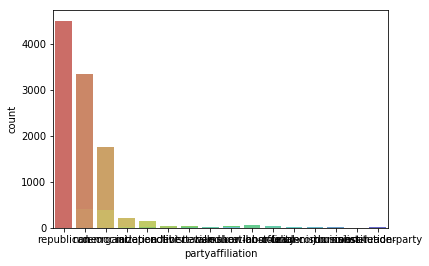

In [6]:
#by calling below we can see that training, test and valid data seems to be failry evenly distributed between the classes
create_distribution(train_news)
create_distribution(test_news)
create_distribution(valid_news)

### Data Preperation


#### Data integrity check (missing label values)

In [7]:

#none of the datasets contains missing values therefore no cleaning required
def data_qualityCheck():
    
    print("Checking data qualitites...")
    train_news.isnull().sum()
    train_news.info()
        
    print("check finished.")

    #below datasets were used to 
    test_news.isnull().sum()
    test_news.info()

    valid_news.isnull().sum()
    valid_news.info()


In [8]:
data_qualityCheck()

Checking data qualitites...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 15 columns):
ID                      10240 non-null object
label                   10240 non-null object
statement               10240 non-null object
subject                 10238 non-null object
speaker                 10238 non-null object
speaker's job title     7343 non-null object
state info              8032 non-null object
partyaffiliation        10238 non-null object
credit history count    10238 non-null float64
barely true             10238 non-null float64
FALSE                   10238 non-null float64
half true               10238 non-null float64
mostly true             10238 non-null float64
pants on fire           10138 non-null object
bag_of_words            0 non-null float64
dtypes: float64(6), object(9)
memory usage: 1.2+ MB
check finished.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 14 columns)

In [9]:
eng_stemmer = SnowballStemmer('english')

In [10]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

#### Stemming

In [11]:

def stem_tokens(tokens, stemmer):
    stemmed = []
    for token in tokens:
        stemmed.append(stemmer.stem(token))
    return stemmed

In [12]:
#process the data
def process_data(data,exclude_stopword=True,stem=True):
    tokens = [w.lower() for w in data]
    tokens_stemmed = tokens
    tokens_stemmed = stem_tokens(tokens, eng_stemmer)
    tokens_stemmed = [w for w in tokens_stemmed if w not in stopwords ]
    return tokens_stemmed

In [13]:
processed_data = process_data(train_news['statement'],stopwords)
processed_data

['says the annies list political group supports third-trimester abortions on demand.',
 'when did the decline of coal start? it started when natural gas took off that started to begin in (president george w.) bushs administration.',
 'hillary clinton agrees with john mccain "by voting to give george bush the benefit of the doubt on iran."',
 'health care reform legislation is likely to mandate free sex change surgeries.',
 'the economic turnaround started at the end of my term.',
 'the chicago bears have had more starting quarterbacks in the last 10 years than the total number of tenured (uw) faculty fired during the last two decades.',
 'jim dunnam has not lived in the district he represents for years now.',
 "i'm the only person on this stage who has worked actively just last year passing, along with russ feingold, some of the toughest ethics reform since watergate.",
 'however, it took $19.5 million in oregon lottery funds for the port of newport to eventually land the new noaa mari

#### Creating ngrams

In [14]:
#unigram 
def create_unigram(words):
    assert type(words) == list
    return words


In [15]:
#bigram
def create_bigrams(words):
    assert type(words) == list
    skip = 0
    join_str = " "
    Len = len(words)
    if Len > 1:
        lst = []
        for i in range(Len-1):
            for k in range(1,skip+2):
                if i+k < Len:
                    lst.append(join_str.join([words[i],words[i+k]]))
    else:
        #set it as unigram
        lst = create_unigram(words)
    return lst


In [16]:
bigrams = create_bigrams(processed_data)
bigrams

['says the annies list political group supports third-trimester abortions on demand. when did the decline of coal start? it started when natural gas took off that started to begin in (president george w.) bushs administration.',
 'when did the decline of coal start? it started when natural gas took off that started to begin in (president george w.) bushs administration. hillary clinton agrees with john mccain "by voting to give george bush the benefit of the doubt on iran."',
 'hillary clinton agrees with john mccain "by voting to give george bush the benefit of the doubt on iran." health care reform legislation is likely to mandate free sex change surgeries.',
 'health care reform legislation is likely to mandate free sex change surgeries. the economic turnaround started at the end of my term.',
 'the economic turnaround started at the end of my term. the chicago bears have had more starting quarterbacks in the last 10 years than the total number of tenured (uw) faculty fired during t

#### Tokenize

In [17]:
porter = PorterStemmer()

def tokenizer(text):
    return text.split()

In [18]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [19]:
doc = ['runners like running and thus they run','this is a test for tokens']

In [20]:

#tokenizer([word for line in test_news.iloc[:,1] for word in line.lower().split()])

### Feature Selection

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import nltk
import nltk.corpus 
from nltk.tokenize import word_tokenize
from gensim.models.word2vec import Word2Vec


### Bag of words

In [22]:
#we will start with simple bag of words technique 
#creating feature vector - document term matrix
countV = CountVectorizer()
train_count = countV.fit_transform(train_news['statement'].values)

print(countV)
print(train_count)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
  (0, 3278)	1
  (0, 7728)	1
  (0, 615)	1
  (0, 11296)	1
  (0, 11036)	1
  (0, 10709)	1
  (0, 5115)	1
  (0, 8376)	1
  (0, 6639)	1
  (0, 1044)	1
  (0, 10988)	1
  (0, 9676)	1
  (1, 751)	1
  (1, 1964)	1
  (1, 4910)	1
  (1, 8554)	1
  (1, 5687)	1
  (1, 1532)	1
  (1, 11110)	1
  (1, 10980)	1
  (1, 7674)	1
  (1, 11138)	1
  (1, 4860)	1
  (1, 7418)	1
  (1, 10426)	2
  :	:
  (10239, 6853)	1
  (10239, 10594)	1
  (10239, 3989)	1
  (10239, 10918)	1
  (10239, 8996)	1
  (10239, 10660)	1
  (10239, 2549)	1
  (10239, 11622)	1
  (10239, 2568)	1
  (10239, 799)	1
  (10239, 11660)	2
  (10239, 12158)	1
  (10239, 3309)	1
  (10239, 11004)	1
  (10

In [23]:
#print training doc term matrix
#we have matrix of size of (10240, 12196) by calling below
def get_countVectorizer_stats():
    
    #vocab size
    train_count.shape

    #check vocabulary using below command
    print(countV.vocabulary_)

    #get feature names
    print(countV.get_feature_names()[:25])

In [24]:
get_countVectorizer_stats()

{'says': 9676, 'the': 10988, 'annies': 1044, 'list': 6639, 'political': 8376, 'group': 5115, 'supports': 10709, 'third': 11036, 'trimester': 11296, 'abortions': 615, 'on': 7728, 'demand': 3278, 'when': 11934, 'did': 3434, 'decline': 3185, 'of': 7672, 'coal': 2475, 'start': 10425, 'it': 6052, 'started': 10426, 'natural': 7418, 'gas': 4860, 'took': 11138, 'off': 7674, 'that': 10980, 'to': 11110, 'begin': 1532, 'in': 5687, 'president': 8554, 'george': 4910, 'bushs': 1964, 'administration': 751, 'hillary': 5401, 'clinton': 2444, 'agrees': 856, 'with': 12027, 'john': 6133, 'mccain': 6967, 'by': 1989, 'voting': 11748, 'give': 4954, 'bush': 1962, 'benefit': 1569, 'doubt': 3684, 'iran': 5999, 'health': 5310, 'care': 2096, 'reform': 9099, 'legislation': 6502, 'is': 6014, 'likely': 6605, 'mandate': 6834, 'free': 4735, 'sex': 9923, 'change': 2256, 'surgeries': 10721, 'economic': 3842, 'turnaround': 11351, 'at': 1259, 'end': 3990, 'my': 7374, 'term': 10939, 'chicago': 2313, 'bears': 1506, 'have': 

### Tf-Idf

In [25]:
#create tf-df frequency features
#tf-idf 
tfidfV = TfidfTransformer()
train_tfidf = tfidfV.fit_transform(train_count)
tfidfV
train_tfidf

<10240x12199 sparse matrix of type '<class 'numpy.float64'>'
	with 165986 stored elements in Compressed Sparse Row format>

In [26]:
def get_tfidf_stats():
    train_tfidf.shape
    #get train data feature names 
    print(train_tfidf.A[:20])


In [27]:
get_tfidf_stats()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.21468018 0.         ... 0.         0.         0.        ]]


In [28]:
#bag of words - with n-grams
#countV_ngram = CountVectorizer(ngram_range=(1,3),stop_words='english')
#tfidf_ngram  = TfidfTransformer(use_idf=True,smooth_idf=True)

tfidf_ngram = TfidfVectorizer(stop_words='english',ngram_range=(1,4),use_idf=True,smooth_idf=True)
tfidf_ngram

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [29]:
#POS Tagging
tagged_sentences = nltk.corpus.treebank.tagged_sents()

cutoff = int(.75 * len(tagged_sentences))
training_sentences = train_news['statement']
 
training_sentences.head(10)

0    Says the Annies List political group supports ...
1    When did the decline of coal start? It started...
2    Hillary Clinton agrees with John McCain "by vo...
3    Health care reform legislation is likely to ma...
4    The economic turnaround started at the end of ...
5    The Chicago Bears have had more starting quart...
6    Jim Dunnam has not lived in the district he re...
7    I'm the only person on this stage who has work...
8    However, it took $19.5 million in Oregon Lotte...
9    Says GOP primary opponents Glenn Grothman and ...
Name: statement, dtype: object

In [30]:
#training POS tagger based on words
def features(sentence, index):
    """ sentence: [w1, w2, ...], index: the index of the word """
    return {
        'word': sentence[index],
        'is_first': index == 0,
        'is_last': index == len(sentence) - 1,
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'is_all_caps': sentence[index].upper() == sentence[index],
        'is_all_lower': sentence[index].lower() == sentence[index],
        'prefix-1': sentence[index][0],
        'prefix-2': sentence[index][:2],
        'prefix-3': sentence[index][:3],
        'suffix-1': sentence[index][-1],
        'suffix-2': sentence[index][-2:],
        'suffix-3': sentence[index][-3:],
        'prev_word': '' if index == 0 else sentence[index - 1],
        'next_word': '' if index == len(sentence) - 1 else sentence[index + 1],
        'has_hyphen': '-' in sentence[index],
        'is_numeric': sentence[index].isdigit(),
        'capitals_inside': sentence[index][1:].lower() != sentence[index][1:]
    }

In [31]:
length = len(training_sentences)
length

10240

In [32]:
#helper function to strip tags from tagged corpus	
def untag(tagged_sentence):
    return [w for w, t in tagged_sentence]


In [33]:
training_statement = training_sentences.head(1)
training_statement


0    Says the Annies List political group supports ...
Name: statement, dtype: object

### Feature Extraction:
- Using word2vec: Word2vec is a group of related models that are used to produce word embeddings. 
- GloVe: Global Vectors for Word Representation(unsupervised learning algorithm for obtaining vector representations for words.)

In [34]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 
  
#Using Word2Vec 
sample = open("/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Assignment_Alternus Vera/Part III/glove.6B/glove.6B.50d.txt", "r")

s = sample.read()
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
  
    data.append(temp) 
  
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1,  
                              size = 100, window = 5) 
#model = gensim.models.Word2Vec(X, size=100) # x be tokenized text
#w2v = dict(zip(model.wv.index2word, model.wv.syn0))


In [35]:
w2v = dict(zip(model1.wv.index2word, model1.wv.syn0))
w2v

{'.': array([-0.05404556, -0.02709315, -0.29017952,  0.0073105 , -0.15188874,
         0.07925188,  0.08839863, -0.01836015,  0.07483228,  0.02328297,
        -0.03815872,  0.11932336,  0.09669303,  0.08036504, -0.06807686,
        -0.19715534, -0.07101084, -0.13529591,  0.00644862,  0.06848671,
         0.03812199, -0.0923688 , -0.04999641, -0.01449525, -0.08027556,
        -0.02600578,  0.03519275,  0.13065638,  0.07113248,  0.07737102,
        -0.01908019, -0.05067328, -0.09223066,  0.10126185, -0.04289471,
         0.05064302, -0.11786843, -0.06330898, -0.14664018, -0.13888739,
         0.01351272,  0.01078867, -0.00475369, -0.03109008, -0.0325142 ,
         0.04188589, -0.01299648, -0.333126  ,  0.04495398,  0.11845474,
         0.03439644,  0.18234675,  0.01792165, -0.02457735,  0.03296485,
         0.02390393,  0.27806836, -0.0553794 , -0.09738664, -0.11504738,
         0.14248602,  0.01085453,  0.2203973 ,  0.03961132, -0.09591048,
         0.07693218,  0.19873455,  0.00938957,

In [36]:
from sklearn.feature_extraction.text import HashingVectorizer

# create the transform
vectorizer = HashingVectorizer(n_features=5)

# encode document
vector = vectorizer.transform(train_news['statement'].values)

# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(10240, 5)
[[-0.35355339 -0.35355339  0.35355339 -0.70710678 -0.35355339]
 [-0.83205029  0.2773501   0.2773501  -0.2773501   0.2773501 ]
 [-0.22941573  0.45883147 -0.45883147 -0.6882472  -0.22941573]
 ...
 [-0.2773501   0.5547002  -0.5547002  -0.5547002   0.        ]
 [-0.23570226  0.         -0.47140452 -0.70710678  0.47140452]
 [-0.46816459  0.70224688 -0.11704115  0.23408229 -0.46816459]]


In [37]:
print(vector.toarray() * 0.25)

[[-0.08838835 -0.08838835  0.08838835 -0.1767767  -0.08838835]
 [-0.20801257  0.06933752  0.06933752 -0.06933752  0.06933752]
 [-0.05735393  0.11470787 -0.11470787 -0.1720618  -0.05735393]
 ...
 [-0.06933752  0.13867505 -0.13867505 -0.13867505  0.        ]
 [-0.05892557  0.         -0.11785113 -0.1767767   0.11785113]
 [-0.11704115  0.17556172 -0.02926029  0.05852057 -0.11704115]]


In [38]:
model1

In [39]:
def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        self.dim = len(word2vec.itervalues().next())


In [40]:
 def fit(self, X, y):
        return self

In [41]:
def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

### Classifiers:

In [42]:
import numpy as np
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [43]:
#string to test
doc_new = ['obama is running for president in 2016']

#### Naive Bayes:

In [44]:
#building classifier using naive bayes 
nb_pipeline = Pipeline([
        ('NBCV',countV),
        ('nb_clf',MultinomialNB())])

In [45]:
nb_pipeline.fit(train_news['statement'].astype(str),train_news['partyaffiliation'].astype(str))


Pipeline(memory=None,
     steps=[('NBCV', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)), ('nb_clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [46]:

df = test_news['statement']
predicted_nb = nb_pipeline.predict(test_news['statement'].values.astype('U'))


In [47]:
np.mean(predicted_nb == test_news['partyaffiliation'])


0.0871407760561515

In [48]:
#building classifier using logistic regression
logR_pipeline = Pipeline([
        ('LogRCV',countV),
        ('LogR_clf',LogisticRegression())
        ])

In [49]:
logR_pipeline.fit(train_news['statement'].astype(str),train_news['partyaffiliation'].astype(str))


Pipeline(memory=None,
     steps=[('LogRCV', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        str...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [50]:
predicted_LogR = logR_pipeline.predict(test_news['statement'].values.astype('U'))

In [51]:
np.mean(predicted_LogR == test_news['partyaffiliation'])


0.08568401536220369

In [52]:
#building Linear SVM classfier
svm_pipeline = Pipeline([
        ('svmCV',countV),
        ('svm_clf',svm.LinearSVC())
        ])

In [53]:
svm_pipeline.fit(train_news['statement'].astype(str),train_news['partyaffiliation'].astype(str))
predicted_svm = svm_pipeline.predict(test_news['statement'].values.astype('U'))
np.mean(predicted_svm == test_news['partyaffiliation'])


0.07720831677923454

In [54]:
#using SVM Stochastic Gradient Descent on hinge loss
sgd_pipeline = Pipeline([
        ('svm2CV',countV),
        ('svm2_clf',SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5))
        ])

In [55]:
sgd_pipeline.fit(train_news['statement'].astype(str),train_news['partyaffiliation'].astype(str))
predicted_sgd = sgd_pipeline.predict(test_news['statement'].values.astype('U'))
np.mean(predicted_sgd == test_news['partyaffiliation'])

0.08409482187789696

In [56]:
#random forest
random_forest = Pipeline([
        ('rfCV',countV),
        ('rf_clf',RandomForestClassifier(n_estimators=200,n_jobs=3))
        ])

In [57]:
random_forest.fit(train_news['statement'].astype(str),train_news['partyaffiliation'].astype(str))
predicted_rf = random_forest.predict(test_news['statement'].values.astype('U'))
np.mean(predicted_rf == test_news['partyaffiliation'])

0.08422725466825585

### Prediction:

In [58]:
import pickle

In [59]:
#obama is running for president in 2016
#Denali is the Kenyan word for black power.

var = input("Please enter the news text you want to verify: ")
print("You entered: " + str(var))

Please enter the news text you want to verify: Denali is the Kenyan word for black power.
You entered: Denali is the Kenyan word for black power.


In [61]:
#function to run for prediction
def detecting_fake_news(var):    
#retrieving the best model for prediction call
    load_model = pickle.load(open('/Users/ravalinagabandi/Desktop/sjsu/Sem III/Machine Learning/Assignment_Alternus Vera/Part III/final_model.sav', 'rb'))
    prediction = load_model.predict([var])
    prob = load_model.predict_proba([var])

    return (print("The given statement is ",prediction[0]),
        print("The truth probability score is ",prob[0][1]))

In [62]:
detecting_fake_news(var)


The given statement is  True
The truth probability score is  0.5375753383657569


(None, None)